# World Happiness Report

People reasonably strive for happiness. Although it is something subjective, there are often commonalities that bring happiness. [The World Happiness Report](https://worldhappiness.report/) attempts to characterize aspects of happiness, and rank 155 countries yearly. This [Kaggle dataset](https://www.kaggle.com/unsdsn/world-happiness) consists of data reported by The World Happiness Report.

Since happiness is such a sought-after treasure, maybe analyzing The World Happiness Report can bring us a step closer to uncovering happiness.

### Content:

The World Happiness Report uses data from the Gallup World Poll, scoring based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The rankings are from nationally representative samples, for the 2-3 years prior to the report. Additionally, there are six factors – economic production (GDP per capita), social support, life expectancy, freedom, perception of corruption, and generosity – that contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 

The above description is taken from [The World Happiness Report FAQ](https://worldhappiness.report/faq/). Please visit [The World Happiness Report website](https://worldhappiness.report/) for a more detailed description of its data.

### Analysis:
This notebook is formatted as such:
* [1. Loading and Cleaning the Dataset](#1): Loading the data from 2015-2019 and making sure they're all formatted in the same way so they can all be joined and analyzed together.
* [2. Data Visualizations](#2)
    * [2.1 Score distributions](#2.1): Distribution of the happiness scores and their core components
    * [2.2 Correlation between components](#2.2)
* [3. Questions to Explore](#3)
    * [3.1 Who are the top 5 happiest countries over the years?](#3.1)
    * [3.2 Are some regions happier? Why?](#3.2)
* [4. Seeing Happiness throughout the Years](#mapviz)
    * [4.1 Prepare the data](#mv1)
    * [4.2 Visualizing World Happiness](#mv2): Interactive world map showcasing the happiness ranks and its subcategories throughout 2015-2019

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Change the jupyter displays
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 1. Loading and Cleaning the Dataset <a name='1'></a>

In [4]:
#Load the Kaggle goodreads dataset obtained from
#https://www.kaggle.com/unsdsn/world-happiness
happy2015 = pd.read_csv('2015.csv')
happy2016 = pd.read_csv('2016.csv')
happy2017 = pd.read_csv('2017.csv')
happy2018 = pd.read_csv('2018.csv')
happy2019 = pd.read_csv('2019.csv')

In [5]:
happy2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [6]:
#Correct country name
happy2015.loc[happy2015.Country=='North Cyprus', 'Country'] = 'Northern Cyprus'

In [7]:
happy2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [8]:
#Correct country name
happy2016.loc[happy2016.Country=='North Cyprus', 'Country'] = 'Northern Cyprus'

In [9]:
happy2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [10]:
#Rename locations to be consistent with other years
happy2017.loc[happy2017.Country == 'Taiwan Province of China', 'Country'] = 'Taiwan'
happy2017.loc[happy2017.Country == 'Hong Kong S.A.R., China', 'Country'] = 'Hong Kong'
happy2017.loc[happy2017.Country=='North Cyprus', 'Country'] = 'Northern Cyprus'

In [11]:
happy2018.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [12]:
happy2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


To combine all of them into one dataframe for easier analysis:

In [13]:
#Create regions dictionary to apply to the rest of the years'
regions = {}

for country in happy2016['Country'].unique():
    regions[country] = happy2016[happy2016['Country']==country]['Region'].tolist()

#Add in countries not in 2016 to the dictionary
regions['Central African Republic'] = 'Sub-Saharan Africa'
regions['Mozambique'] = 'Sub-Saharan Africa'
regions['Lesotho'] = 'Sub-Saharan Africa'
regions['Swaziland'] = 'Sub-Saharan Africa'
regions['Trinidad & Tobago'] = 'Latin America and Caribbean'
regions['Djibuoti'] = 'Sub-Saharan Africa'
regions['North Macedonia'] = 'Central and Eastern Europe'
regions['Somaliland region'] = 'Sub-Saharan Africa'
regions['Oman'] = 'Sub-Saharan Africa'
regions['Djibouti'] = 'Sub-Saharan Africa'
regions['Gambia'] = 'Sub-Saharan Africa'

In [14]:
def reformat(df_year, year):
    """Prepare each dataframe into a consistent format to make it easier to combine them all."""
    
    #Rename all columns
    for col in df_year.columns:
        if 'rank' in col.lower():
            df_year.rename(columns={col:'Rank'}, inplace=True)
        elif 'country' in col.lower():
            df_year.rename(columns={col:'Country'}, inplace=True)
        elif 'score' in col.lower():
            df_year.rename(columns={col:'Score'}, inplace=True)
        elif 'health' in col.lower():
            df_year.rename(columns={col:'LifeExp'}, inplace=True)
        elif 'gdp' in col.lower():
            df_year.rename(columns={col:'GDPperCapita'}, inplace=True)
        elif col.lower() in ['social support','family']:
            df_year.rename(columns={col:'Social'}, inplace=True)
        elif 'freedom' in col.lower():
            df_year.rename(columns={col:'Freedom'}, inplace=True)
        elif 'corruption' in col.lower():
            df_year.rename(columns={col:'Corruption'}, inplace=True)
    
    #Add region column
    df_year['Region'] = df_year['Country'].replace(regions)
    
    #Add year column
    df_year['Year'] = year
    
    return df_year

In [15]:
#Make list of columns to keep
cols = ['Country', 'Region', 'Rank', 'Score', 'LifeExp', 'GDPperCapita', 'Social', 'Freedom', 'Generosity', 'Corruption', 'Year']

#Reformat all dataframes and combine them
df = reformat(happy2015, 2015)[cols]
df = df.append(reformat(happy2016, 2016), sort=False)
df = df.append(reformat(happy2017, 2017), sort=False)
df = df.append(reformat(happy2018, 2018), sort=False)
df = df.append(reformat(happy2019, 2019), sort=False)

In [16]:
df.head(10)

,Country,Region,Rank,Score,LifeExp,GDPperCapita,Social,Freedom,Generosity,Corruption,Year,Lower Confidence Interval,Upper Confidence Interval,Dystopia Residual,Whisker.high,Whisker.low,Dystopia.Residual
0,Switzerland,Western Europe,1,7.587,0.94143,1.39651,1.34951,0.66557,0.29678,0.41978,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.94784,1.30232,1.40223,0.62877,0.43630,0.14145,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.87464,1.32548,1.36058,0.64938,0.34139,0.48357,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.88521,1.45900,1.33095,0.66973,0.34699,0.36503,2015,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.90563,1.32629,1.32261,0.63297,0.45811,0.32957,2015,NaN,NaN,NaN,NaN,NaN,NaN
5,Finland,Western Europe,6,7.406,0.88911,1.29025,1.31826,0.64169,0.23351,0.41372,2015,NaN,NaN,NaN,NaN,NaN,NaN
6,Netherlands,Western Europe,7,7.378,0.89284,1.32944,1.28017,0.61576,0.47610,0.31814,2015,NaN,NaN,NaN,NaN,NaN,NaN
7,Sweden,Western Europe,8,7.364,0.91087,1.33171,1.28907,0.65980,0.36262,0.43844,2015,NaN,NaN,NaN,NaN,NaN,NaN
8,New Zealand,Australia and New Zealand,9,7.286,0.90837,1.25018,1.31967,0.63938,0.47501,0.42922,2015,NaN,NaN,NaN,NaN,NaN,NaN
9,Australia,Australia and New Zealand,10,7.284,0.93156,1.33358,1.30923,0.65124,0.43562,0.35637,2015,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.Region.value_counts(dropna=False)

Sub-Saharan Africa                 197
Central and Eastern Europe         145
Latin America and Caribbean        111
Western Europe                     105
Middle East and Northern Africa     95
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        30
North America                       10
Australia and New Zealand           10
Name: Region, dtype: int64

In [18]:
df.describe()

,Rank,Score,LifeExp,GDPperCapita,Social,Freedom,Generosity,Corruption,Year,Lower Confidence Interval,Upper Confidence Interval,Dystopia Residual,Whisker.high,Whisker.low,Dystopia.Residual
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,157.000000,157.000000,157.000000,155.000000,155.000000,155.000000
mean,78.698210,5.379018,0.612416,0.916047,1.078392,0.411091,0.218576,0.125436,2016.993606,5.282395,5.481975,2.325807,5.452326,5.255713,1.850238
std,45.182384,1.127456,0.248309,0.407340,0.329548,0.152880,0.122321,0.105816,1.417364,1.148043,1.136493,0.542220,1.118542,1.145030,0.500028
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,2.732000,3.078000,0.817890,2.864884,2.521116,0.377914
25%,40.000000,4.509750,0.440183,0.606500,0.869363,0.309768,0.130000,0.054000,2016.000000,4.327000,4.465000,2.031710,4.608172,4.374955,1.591291
50%,79.000000,5.322000,0.647310,0.982205,1.124735,0.431000,0.201982,0.091000,2017.000000,5.237000,5.419000,2.290740,5.370032,5.193152,1.832910
75%,118.000000,6.189500,0.808000,1.236187,1.327250,0.531000,0.278832,0.156030,2018.000000,6.154000,6.434000,2.664650,6.194600,6.006527,2.144654
max,158.000000,7.769000,1.141000,2.096000,1.644000,0.724000,0.838075,0.551910,2019.000000,7.460000,7.669000,3.837720,7.622030,7.479556,3.117485


# 2. Data Visualizations <a name='2'></a>

## Score Distributions <a name='2.1'></a>

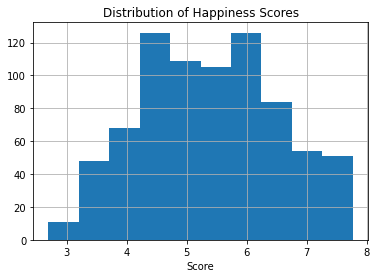

In [19]:
df.Score.hist()

plt.title('Distribution of Happiness Scores')
plt.xlabel('Score')
plt.show()

The score distribution looks relatively normal.

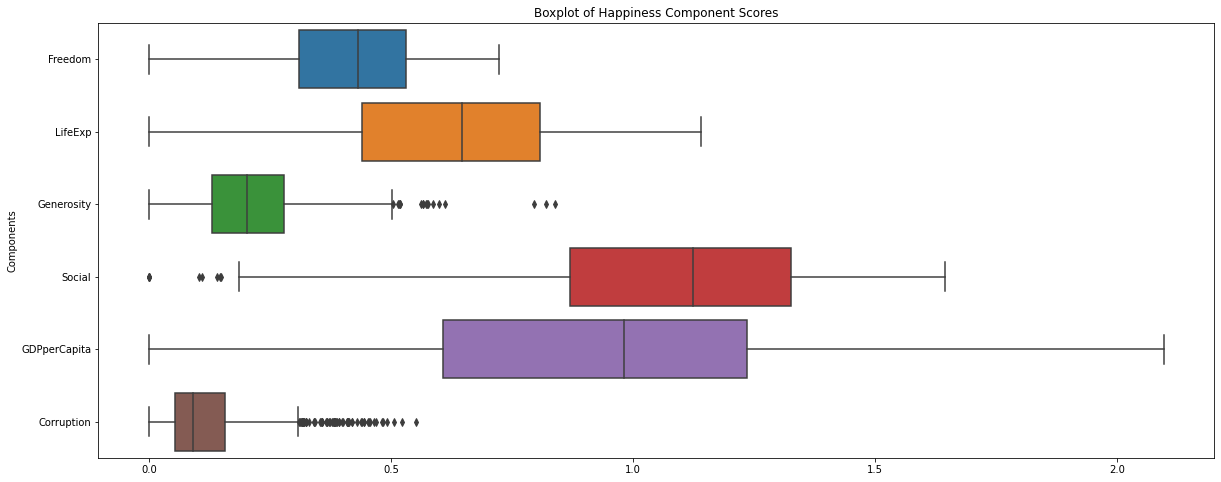

In [20]:
components = df[['Freedom', 'LifeExp', 'Generosity', 'Social', 'GDPperCapita', 'Corruption']]

#Plot the happiness score components
plt.figure(figsize=(20,8))
sns.boxplot(data=components, orient='h')

plt.ylabel('Components')
plt.title('Boxplot of Happiness Component Scores')
plt.show()

It appears that GDP per Capita has the most range in its contribution to the happiness scores. Perception of corruption doesn't have much contribution, but there are a lot of outliers on the top end, same with generosity.

## Correlations between Components <a name='2.2'></a>

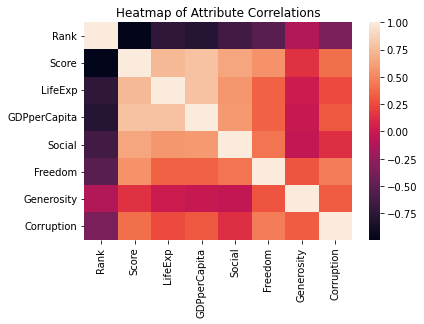

In [83]:
#Obtain correlations
corr = df[['Rank','Score','LifeExp','GDPperCapita','Social','Freedom','Generosity','Corruption']].corr()

#Plot the heatmap
sns.heatmap(corr)

plt.title('Heatmap of Attribute Correlations')
plt.show()

Although The World Happiness Report states that the subcategories have no factor in the overall score and ranking, the correlation heatmap shows that they are somewhat correlated, especially to the countries' rankings. The World Happines Report does explain that the subcategories act as possible explanations for the difference in rankings, which could be why they're correlated.

# 3. Questions to Explore <a name='3'></a>
## Who are the top 5 happiest countries from 2015-2019? <a name='3.1'></a>

I'm aware that Switzerland ranks pretty high in the happiest countries' list so I expect to see Switzerland come up often. I also expect the list to be pretty consistent throughout the years since it would rare to have a drastic change in happiness from one year to the next.

In [21]:
top5 = df[df.Rank <= 5][['Year','Country', 'Rank','Region']]

In [22]:
top5.head()

,Year,Country,Rank,Region
0,2015,Switzerland,1,Western Europe
1,2015,Iceland,2,Western Europe
2,2015,Denmark,3,Western Europe
3,2015,Norway,4,Western Europe
4,2015,Canada,5,North America


In [23]:
top5.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands'], dtype=object)

In [24]:
def country_data(name, df=top5):
    """Extract a specific country's data from the top 5 happiest countries dataframe."""
    df = df[df.Country == name].drop(columns='Country')
    return df

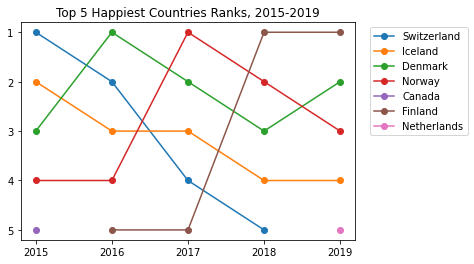

In [25]:
#Plot the countries' data lines
for country in top5.Country.unique():
    plt.plot(country_data(country).Year, country_data(country).Rank, 'o-', label=country)
    
#Format the tick labels    
plt.xticks(np.arange(2015,2020)) 
plt.yticks(np.arange(1,6))
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

plt.title('Top 5 Happiest Countries Ranks, 2015-2019')
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right')
plt.show()

The top 5 happiest countries are indeed quite stable over the years: Denmark, Norway, Finland, Iceland, Switzerland. Iceland, Denmark, and Norway kept their positions in the top 5 happiest countries throughout 2015-2019.

Canada was in top 5 during 2015, but was soon replaced by Finland who jumped to take the first place two years in a row. In 2019, the Netherlands made it to the top 5, booting Switzerland whose ranking was declining over the years. Most of these countries are in the Scandinavian Peninsula; it seems like they're doing something right in that region. This brings me to the next question:

## Are some regions happier than others? What are some possible reasons?
To investigate this, the data should be grouped by regions. Since some years contained certain data while others didn't (like the confidence intervals or dystopia residual), I will separate them by years as well. This will also highlight any changes over time.

In [26]:
regional = df.groupby(['Region','Year']).mean()
regional

Rank     Score   LifeExp  \
Region                          Year                                   
Australia and New Zealand       2015    9.500000  7.285000  0.919965   
                                2016    8.500000  7.323500  0.841080   
                                2017    9.000000  7.299000  0.830323   
                                2018    9.000000  7.298000  0.893000   
                                2019    9.500000  7.267500  1.031000   
Central and Eastern Europe      2015   79.000000  5.332931  0.718774   
                                2016   78.448276  5.370690  0.631592   
                                2017   75.068966  5.409931  0.636090   
                                2018   74.965517  5.463966  0.686690   
                                2019   70.965517  5.561517  0.809517   
Eastern Asia                    2015   64.500000  5.626167  0.877388   
                                2016   67.166667  5.624167  0.806680   
                                2017   64.833333  5.646667  0.808323   
                                2018   65.500000  5.672000  0.867333   
                                2019   64.833333  5.688833  0.953333   
Latin America and Caribbean     2015   46.909091  6.144682  0.703870   
                                2016   48.333333  6.101750  0.612703   
                                2017   50.772727  5.957818  0.611009   
                                2018   50.545455  5.950136  0.652864   
                                2019   51.380952  5.954429  0.811857   
Middle East and Northern Africa 2015   80.526316  5.330789  0.702608   
                                2016   78.105263  5.386053  0.616438   
                                2017   76.421053  5.369684  0.605980   
                                2018   80.894737  5.282737  0.646632   
                                2019   84.894737  5.237000  0.751053   
North America                   2015   10.000000  7.273000  0.883710   
                                2016    9.500000  7.254000  0.803300   
                                2017   10.500000  7.154500  0.804422   
                                2018   12.500000  7.107000  0.857500   
                                2019   14.000000  7.085000  0.956500   
Southeastern Asia               2015   81.222222  5.317444  0.677357   
                                2016   80.000000  5.338889  0.561369   
                                2017   73.750000  5.444875  0.581918   
                                2018   81.888889  5.313444  0.605333   
                                2019   85.111111  5.273667  0.745333   
Southern Asia                   2015  113.142857  4.580857  0.540830   
                                2016  111.714286  4.563286  0.453670   
                                2017  109.857143  4.628429  0.456658   
                                2018  111.714286  4.603857  0.497286   
                                2019  115.857143  4.526857  0.617000   
Sub-Saharan Africa              2015  125.317073  4.267439  0.294050   
                                2016  129.657895  4.136421  0.239872   
                                2017  127.871795  4.111949  0.224766   
                                2018  126.923077  4.195026  0.260615   
                                2019  124.800000  4.300050  0.407550   
Western Europe                  2015   29.523810  6.689619  0.909148   
                                2016   29.190476  6.685667  0.825754   
                                2017   27.142857  6.703714  0.824673   
                                2018   24.666667  6.781762  0.896429   
                                2019   23.380952  6.842190  1.015190   

                                      GDPperCapita    Social   Freedom  \
Region                          Year                                     
Australia and New Zealand       2015      1.291880  1.314450  0.645310   
                                2016      1.402545  1.138770  0.574920   
   

# Seeing Happiness throughout the Years <a name='mapviz'></a>

I'd like to see each country's rankings as a whole, visualizing the whole world map. This would make it easier to see any regional trends, especially over the years.

## Prepare the data <a name='mv1'></a>
In order to visualize the world map, countries' coordinates are needed.

In [27]:
import geopandas as gpd

In [28]:
country_shp = 'shapefile/ne_110m_admin_0_countries.shp'
tiny_shp = 'shapefile/ne_110m_admin_0_tiny_countries.shp'
populated_shp = 'shapefile/ne_110m_populated_places.shp'

In [29]:
country_gdf = gpd.read_file(country_shp)
country_gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,Self admin.,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least developed region,5. Low income,WI,EH,EH,ESH,ESH,732,732,732,-99,-99,23424990,23424990,Exact WOE match as country,MAR,SAH,MAR,SAH,SAH,SAH,SAH,SAH,SAH,SAH,SAH,SAH,SAH,SAH,MAR,MAR,SAH,MAR,SAH

In [30]:
country_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 162 entries, featurecla to geometry
dtypes: float64(4), geometry(1), int64(25), object(132)
memory usage: 224.1+ KB


In [31]:
tiny_gdf = gpd.read_file(tiny_shp)
tiny_gdf.head()

,scalerank,featurecla,sr_label_i,sr_label_o,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,1,Admin-0 Tiny Countries,2,4,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,VUT,0,Vanuatu,VUT,0,Vanuatu,VUT,0,Vanuatu,Vanuatu,VUT,Vanuatu,None,Van.,VU,Republic of Vanuatu,None,Vanuatu,None,None,Vanuatu,None,6,3,7,3,299882,10,2019,934,2019,7. Least developed region,4. Lower middle income,NH,VU,VU,VUT,VUT,548,548,548,VU,VUT,23424907,23424907,Exact WOE match as country,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,VUT,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,7,7,4,2,1,0,4.0,9.0,1159321421,Q686,فانواتو,ভানুয়াতু,Vanuatu,Vanuatu,Vanuatu,وانواتو,Vanuatu,Βανουάτου,ונואטו,वानूआटू,Vanuatu,Vanuatu,Vanuatu,バヌアツ,바누아투,Vanuatu,Vanuatu,Vanuatu,Вануату,Vanuatu,Vanuatu,Вануату,وانواتو,Vanuatu,瓦努阿图,萬那杜,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (166.92707 -15.36796)
1,1,Admin-0 Tiny Countries,2,6,6,France,FR1,1,2,Dependency,French Southern and Antarctic Lands,ATF,0,French Southern and Antarctic Lands,ATF,0,French Southern and Antarctic Lands,ATF,0,Fr. S. Antarctic Lands,French Southern and Antarctic Lands,ATF,Fr. S. and Antarctic Lands,None,Fr. S.A.L.,TF,Territory of the French Southern and Antarctic...,None,None,Fr.,None,French Southern and Antarctic Lands,None,7,5,9,11,140,1,2017,16,2016,6. Developing region,2. High income: nonOECD,FS,TF,TF,ATF,ATF,260,260,260,-99,-99,28289406,28289406,Exact WOE match as country,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,ATF,-99,-99,Seven seas (open ocean),Africa,Seven seas (open ocean),Sub-Saharan Africa,22,35,10,2,-99,0,4.0,9.0,1159320631,Q129003,أراض فرنسية جنوبية وأنتارتيكية,ফ্র. এস. অ্যান্ড অ্যান্টার্কটিক ল্যান্ড,Französische Süd- und Antarktisgebiete,French Southern and Antarctic Lands,Tierras Australes y Antárticas Francesas,سرزمینهای جنوبی و جنوبگانی فرانسه,Terres australes et antarctiques françaises,Γαλλικά Νότια και Ανταρκτικά Εδάφη,הארצות הדרומיות והאנטארקטיות של צרפת,दक्षिण फ्रांसीसी और अंटार्कटिक लैंड,Francia déli és antarktiszi területek,Daratan Selatan dan Antarktika Perancis,Terre australi e antartiche francesi,フランス領南方・南極地域,프랑스령 남방 및 남극,Franse Zuidelijke Gebieden,Francuskie Terytoria Południowe i Antarktyczne,Terras Austrais e Antárticas Francesas,Французские Южные и Антарктические территории,Franska sydt

In [32]:
tiny_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Columns: 164 entries, scalerank to geometry
dtypes: float64(2), geometry(1), int64(29), object(132)
memory usage: 47.5+ KB


In [33]:
tiny_gdf.NAME_LONG.unique()

array(['Vanuatu', 'French Southern and Antarctic Lands',
       'Turks and Caicos Islands', 'Cook Islands', 'Samoa', 'Tonga',
       'French Polynesia', 'Pitcairn Islands', 'Barbados',
       'Trinidad and Tobago', 'São Tomé and Principe', 'Ascension',
       'Saint Helena', 'Malta', 'Bahrain', 'Maldives',
       'British Indian Ocean Territory', 'Singapore', 'Brunei Darussalam',
       'Palau', 'Northern Mariana Islands', 'Guam',
       'Federated States of Micronesia', 'Marshall Islands', 'Kiribati',
       'Nauru', 'Tuvalu', 'Mauritius', 'Comoros', 'Faeroe Islands',
       'Jan Mayen Island', 'Saint Pierre and Miquelon', 'Bermuda',
       'Azores', 'Canary Islands', 'Madeira',
       'South Georgia and the Islands'], dtype=object)

In [34]:
populated_gdf = gpd.read_file(populated_shp)
populated_gdf.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,MEGANAME,LS_NAME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,MAX_BBXMIN,MIN_BBXMAX,MAX_BBXMAX,MIN_BBYMIN,MAX_BBYMIN,MIN_BBYMAX,MAX_BBYMAX,MEAN_BBXC,MEAN_BBYC,TIMEZONE,UN_FID,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,MIN_ZOOM,WIKIDATAID,WOF_ID,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,LABEL,NAME_AR,NAME_BN,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_SV,NAME_TR,NAME_VI,NE_ID,NAME_FA,NAME_HE,NAME_UK,NAME_UR,NAME_ZHT,GEONAMESID,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,Vatican City,1,None,1,0,Vatican,VAT,Vatican,VAT,Lazio,VA,None,41.903282,12.453387,832,832,562430,2,2,None,Vatican City,636762,636762,0,0,0,20,177,177,68,68,160,160,99,99,12.333333,12.333333,12.481009,12.481009,41.766667,41.766667,42.050000,42.050000,12.419907,41.903477,Europe/Vatican,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,Q237,101914185,0,Vatican City,Vatikanstadt,Ciudad del Vaticano,Cité du Vatican,Vaticano,Ватикан,梵蒂冈,None,الفاتيكان,ভ্যাটিকান সিটি,Βατικανό,वैटिकन नगर,Vatikán,Vatikan,Città del Vaticano,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,1159127243,واتیکان,קריית הוותיקן,Ватикан,ویٹیکن سٹی,梵蒂岡,6691831,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,San Marino,1,None,0,0,San Marino,SMR,San Marino,SMR,None,SM,None,43.936096,12.441770,29579,29000,0,7,7,None,San Marino,29088,29579,0,0,0,20,30,30,11,11,63,63,39,39,12.391667,12.391667,12.541667,12.541667,43.900000,43.900000,44.000000,44.000000,12.462153,43.953472,Europe/San_Marino,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.1,Q1848,101837381,0,San Marino,San Marino,San Marino,Saint-Marin,San Marino,Сан-Марино,圣马力诺,None,مدينة سان مارينو,সান মারিনো,Άγιος Μαρίνος,सैन मारिनो नगर,San Marino,San Marino,Città di San Marino,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,1159146051,سن مارینو,סן מרינו,Сан-Марино,سان مارینو شہر,聖馬力諾,3168070,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,Vaduz,1,None,0,0,Liechtenstein,LIE,Liechtenstein,LIE,None,LI,None,47.133724,9.516670,36281,5342,33009,7,5,None,Vaduz,45442,45442,0,0,0,20,45,45,17,17,90,90,56,56,9.433333,9.433333,9.558333,9.558333,47.091667,47.091667,47.233333,47.233333,9.503734,47.167478,Europe/Vaduz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.7,Q1844,101828603,0,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,Вадуц,瓦都兹,None,فادوتس,ফাডুৎস,Βαντούζ,वादुज़,Vaduz,Vaduz,Vaduz,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,1159146061,فادوتس,ואדוץ,Вадуц,واڈوز,華杜茲,3042030,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,Lobamba,0,Legislative and,0,0,eSwatini,SWZ,eSwatini,SWZ,Manzini,SZ,None,-26.466668,31.199997,9782,4557,0,5,4,None,Lobamba,9782,9782,9782,0,0,50,18,18,7,7,32,32,20,20,31.183333,31.183333,31.233333,31.233333

In [35]:
populated_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 243 entries, 0 to 242
Columns: 137 entries, SCALERANK to geometry
dtypes: float64(13), geometry(1), int64(47), object(76)
memory usage: 260.2+ KB


In [36]:
hk = populated_gdf[populated_gdf.NAME=='Hong Kong']

Combine all the geo dataframes into one for easier merging later:

In [37]:
#Combine all geo dataframe into one
gdf = country_gdf.append(tiny_gdf).append(hk)

#Input SUBUNIT into Hong Kong entry
gdf.loc[gdf.NAME == 'Hong Kong', 'SUBUNIT'] = 'Hong Kong'

In [38]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 215 entries, 0 to 242
Columns: 234 entries, featurecla to GEONAMESID
dtypes: float64(86), geometry(1), int64(2), object(145)
memory usage: 394.7+ KB


In [39]:
gdf.tail()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,sr_label_i,sr_label_o,SCALERANK,NATSCALE,FEATURECLA,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,ADM0NAME,ADM1NAME,NOTE,LATITUDE,LONGITUDE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,MEGANAME,LS_NAME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,MAX_BBXMIN,MIN_BBXMAX,MAX_BBXMAX,MIN_BBYMIN,MAX_BBYMIN,MIN_BBYMAX,MAX_BBYMAX,MEAN_BBXC,MEAN_BBYC,TIMEZONE,UN_FID,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,WOF_ID,CAPALT,LABEL,GEONAMESID
33,Admin-0 Tiny Countries,2.0,6,Portugal,PRT,0.0,3.0,Geo unit,Portugal,PRT,1.0,Azores,PAZ,0.0,Azores,PAZ,0.0,Azores,Azores,PAZ,Azores,None,Az.,AZ,None,None,None,Port.,None,Azores,None,1.0,7.0,1.0,4.0,242796.0,10.0,2019.0,4492.0,2016.0,2. Developed region: nonG7,1. High income: OECD,-99,-99,PT,-99,PRT,-99,620,-099,-99,-99,15021776.0,15021776.0,Exact WOE match as country,-99,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,-99.0,-99.0,Seven seas (open ocean),Europe,Southern Europe,Europe & Central Asia,6.0,6.0,3.0,-99.0,-99.0,0.0,5.0,10.0,1159321189,Q25263,الأزور,অ্যাজোরেস,Azoren,Azores,Azores,آزور,Açores,Αζόρες,האיים האזוריים,एज़ोरेस,Azori-szigetek,Azores,Azzorre,アゾレス諸島,아소르스 제도,Azoren,Azory,Região Autónoma dos Açores,Азорские острова,Azorerna,Azorlar,Азорські острови,آزورس,Açores,亚速尔群岛,亞速群島,Unrecognized,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-28.42347 38.48233),2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Admin-0 Tiny Countries,2.0,5,Spain,ESP,0.0,4.0,Geo subunit,Spain,ESP,0.0,Spain,ESP,1.0,Canary Islands,ESC,0.0,Canary Is.,Canary Islands,ESC,Canary Is.,None,Can. Is.,CI,None,None,None,Sp.,None,Canary Islands,None,4.0,5.0,5.0,5.0,2153389.0,12.0,2019.0,63741.0,2019.0,2. Developed region: nonG7,1. High income: OECD,-99,-99,ES,-99,ESP,-99,724,-099,-99,-99,-99.0,-99.0,Not yet investigated.,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ES

In [40]:
#Filter data for 2016
df2016 = df[df.Year==2016]

In [41]:
missing = [country for country in df2016.Country if country not in list(gdf.SUBUNIT)]
print(len(missing))
missing

7


['Czech Republic',
 'Serbia',
 'Macedonia',
 'Somaliland Region',
 'Palestinian Territories',
 'Congo (Kinshasa)',
 'Congo (Brazzaville)']

Better match the names of the datasets:

In [42]:
#Create dictionary of names to replace
country_rename = {
    'Czechia':'Czech Republic',
    'North Macedonia':'Macedonia',
    'Republic of Serbia':'Serbia',
}

#Replace the names
gdf.SUBUNIT.replace(to_replace=country_rename, inplace=True)

In [43]:
missing = [country for country in df2016.Country if country not in list(gdf.SUBUNIT)]
print(len(missing))
missing

4


['Somaliland Region',
 'Palestinian Territories',
 'Congo (Kinshasa)',
 'Congo (Brazzaville)']

In [44]:
#Obtain only desired columns
gdf = gdf[['SUBUNIT', 'ADM0_A3', 'geometry']]

#Rename columns
gdf.columns = ['country', 'code', 'geometry']
gdf.head()

,country,code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [45]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 215 entries, 0 to 242
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   country   215 non-null    object  
 1   code      215 non-null    object  
 2   geometry  215 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 6.7+ KB


In [46]:
#Drop Antarctica to make map smaller
gdf[gdf.country=='Antarctica']

,country,code,geometry
159,Antarctica,ATA,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


In [47]:
#Drop Antaractica
gdf = gdf.drop(gdf.index[159])

In [48]:
#Confirm Antarctica was deleted
gdf[gdf.country=='Antarctica']

,country,code,geometry


Mapping the country codes:

In [49]:
#Create dictionary mapping for country codes and country names
codemap = {country: code for country, code in zip(gdf.country, gdf.code)}

In [50]:
#Add codes to the dataframe for easier merging
df['Code'] = df['Country'].replace(to_replace=codemap)

## Visualizing World Happiness<a name='mv2'></a>

In [51]:
#Import relevant libraries
import json

from bokeh.io import output_notebook, show, output_file, curdoc, push_notebook
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, Slider, HoverTool, CustomJS
from bokeh import palettes
from bokeh.layouts import widgetbox, row, column

from ipywidgets import interact

In [72]:
#Define functions that returns json_data for year selected by user
def json_data(selectedYear):
    yr = selectedYear
    df_yr = df[df.Year==yr]
    
    merged = gdf.merge(df_yr, left_on='code', right_on='Code', how='left')
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

#Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson=json_data(2016))

#Define sequential multi-hue color palette
palette = palettes.viridis(24)
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 120, nan_color = '#d9d9d9')

#Define custom tick labels for color bar
tick_labels = {0: '', 10:'10', 20:'Top 20', 30:'30', 
               40: '21 - 40', 50: '50', 60: '41 - 60', 70: '70', 
               80: '61 - 80', 90: '90', 100: '81 - 100', 110: '110', 
               115: '115', 120: '>120'
              }

#Add hover tool
hover = HoverTool(tooltips = [('Country','@country'), ('Rank', '@Rank'), 
                            ('Score', '@Score'), ('Life Expectancy', '@LifeExp'),
                             ('Social', '@Social'), ('Freedom', '@Freedom'), ('GDP per Capita','@GDPperCapita'),
                             ('Generosity', '@Generosity'), ('Corruption', '@Corruption')])

#Create color bar
color_bar = ColorBar(color_mapper=color_mapper, 
                     label_standoff=8,
                     width = 500, height = 20,
                     border_line_color=None, 
                     location = (0,0), 
                     orientation = 'horizontal', 
                     major_label_overrides = tick_labels)

#Create figure object
p = figure(title = 'World Happiness Report Map, 2016', 
           plot_height = 600 , plot_width = 950, 
           toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', 
          source = geosource, 
          fill_color = {'field' :'Rank', 
                        'transform' : color_mapper},
          line_color = 'black', 
          line_width = 0.25, 
          fill_alpha = 1)

#Specify layout
p.add_layout(color_bar, 'below')

#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
t = show(p, notebook_handle=True)

#Create function to update plot
def update_plot(year=2016, field='Rank'):
    #Update color mapper criteria
    if (field=='Rank'):
        color_mapper = LinearColorMapper(palette = palette, low = 0, high = 120, nan_color = '#d9d9d9')
    else:
        temp = df.loc[df.Year==year, field].sort_values(ascending=False).reset_index(drop=True)
        color_mapper = LinearColorMapper(palette = palette, low = temp.max(), high = temp.loc[119], nan_color = '#d9d9d9')
    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
                     border_line_color=None, location = (0,0), orientation = 'horizontal', 
                     major_label_overrides = tick_labels) 
    #Update JSON data
    p.patches('xs','ys', 
              source = GeoJSONDataSource(geojson=json_data(year)), 
              fill_color = {'field': field, 
                            'transform': color_mapper},
              line_color = 'black', 
              line_width = 0.25, 
              fill_alpha = 1)
    #Update title
    p.title.text = "World Happiness Report Map, {} Component in {}".format(field, year)
    #Update hover data
    p.tools = [HoverTool(tooltips = [('Country','@country'), ('Rank', '@Rank'), 
                            ('Score', '@Score'), ('Life Expectancy', '@LifeExp'),
                             ('Social', '@Social'), ('Freedom', '@Freedom'),
                             ('Generosity', '@Generosity'), ('Corruption', '@Corruption')])]
    push_notebook()

#Create Jupyter widget to call update function
interact(update_plot, year=(2015,2019), field=['Rank','LifeExp','Social', 'Generosity', 'Freedom', 'Corruption', 'GDPperCapita']);

Loading BokehJS ...

interactive(children=(IntSlider(value=2016, description='year', max=2019, min=2015), Dropdown(description='fie…